In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math


2025-06-25 16:30:15.359610: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750869015.555615      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750869015.609237      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
X = []
y = []

for image_file, label in zip(selected_image_files, selected_labels):
    image_path = os.path.join(image_folder_path, image_file)
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image)
    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [5]:
def create_efficientnetv2s_model():
    base_model = tf.keras.applications.EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.25)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

effnet_model = create_efficientnetv2s_model()
effnet_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
effnet_model.summary()


I0000 00:00:1750869097.072066      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 24)   │            648 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 24)   │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 24)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 24)   │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 24)   │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 24)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 112, 112, 24)   │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 112, 112, 24)   │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 112, 112, 24)   │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 112, 112, 24)   │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 112, 112, 24)   │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 112, 112, 24)   │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 22,168,417 (84.57 MB)

 Trainable params: 22,014,545 (83.98 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [6]:
epochs = 63
batch_size = 32

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def lr_schedule(epoch):
    initial_lr = 0.0001  
    drop = 0.6  
    epochs_drop = 12  
    return initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=13, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/63


I0000 00:00:1750869182.740876      77 service.cc:148] XLA service 0x7f8994024080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750869182.741924      77 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750869190.807450      77 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1750869206.214300      77 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750869206.403347      77 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750869206.853063      77 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750869207.0518

148/148 ━━━━━━━━━━━━━━━━━━━━ 255s 769ms/step - accuracy: 0.7523 - loss: 0.4878 - val_accuracy: 0.9127 - val_loss: 0.2256 - learning_rate: 1.0000e-04
Epoch 2/63
  1/148 ━━━━━━━━━━━━━━━━━━━━ 32s 220ms/step - accuracy: 0.8438 - loss: 0.3198

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.3198 - val_accuracy: 0.9070 - val_loss: 0.2298 - learning_rate: 1.0000e-04
Epoch 3/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 324ms/step - accuracy: 0.9148 - loss: 0.2086 - val_accuracy: 0.9070 - val_loss: 0.2122 - learning_rate: 1.0000e-04
Epoch 4/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - loss: 0.3382 - val_accuracy: 0.9051 - val_loss: 0.2109 - learning_rate: 1.0000e-04
Epoch 5/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 49s 328ms/step - accuracy: 0.9324 - loss: 0.1678 - val_accuracy: 0.9032 - val_loss: 0.2231 - learning_rate: 1.0000e-04
Epoch 6/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.2521 - val_accuracy: 0.8994 - val_loss: 0.2253 - learning_rate: 1.0000e-04
Epoch 7/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 47s 317ms/step - accuracy: 0.9606 - loss: 0.1135 - val_accuracy: 0.9108 - val_loss: 0.2272 - learning_rate: 1.0000e-04
Epoch 8/63
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.

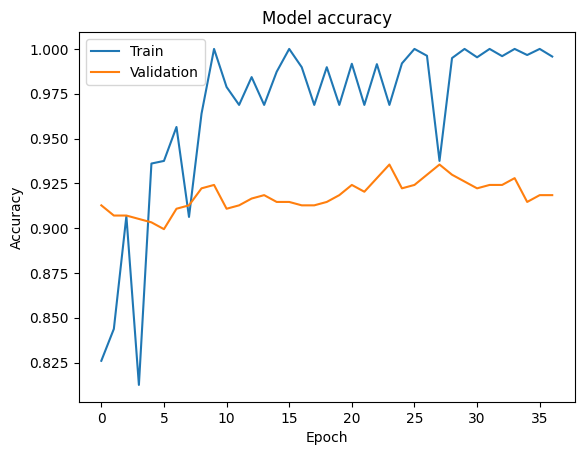

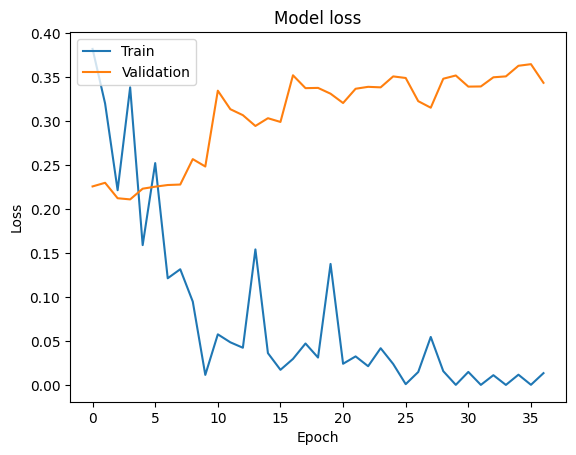

In [7]:
effnet_history = effnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)
loss_effnet, accuracy_effnet = effnet_model.evaluate(X_test, y_test)
print("EfficientNetV2-S - Loss:", loss_effnet, "Accuracy:", accuracy_effnet)

plt.plot(effnet_history.history['accuracy'])
plt.plot(effnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(effnet_history.history['loss'])
plt.plot(effnet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
test_image_folder_path = '/kaggle/input/2025-sum-dpl-302-m/testset_images/testset_images'
test_image_files = [file for file in os.listdir(test_image_folder_path) if not file.startswith('._')]

X_test_pred = []

for image_file in test_image_files:
    image_path = os.path.join(test_image_folder_path, image_file)
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image)
    X_test_pred.append(image)

X_test_pred = np.array(X_test_pred)

test_predictions = effnet_model.predict(X_test_pred)
binary_predictions = (test_predictions > 0.5).astype(int).flatten()


42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 373ms/step


In [9]:
test_df = pd.DataFrame({
    'id': [int(file.split('.')[0]) for file in test_image_files],
    'label': binary_predictions
})

test_predictions_csv_path = '/kaggle/working/test_predictions.csv'
test_df.to_csv(test_predictions_csv_path, index=False)

print(f'Test predictions saved to {test_predictions_csv_path}')


Test predictions saved to /kaggle/working/test_predictions.csv
